In [1]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 1.5.3


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train_con_escalado.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test_con_escalado.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

In [5]:
X_train = X_train[["DiffWalking", "BMI", "PhysicalHealth", "Diabetic", "SleepTime"]]
X_test = X_test[["DiffWalking", "BMI", "PhysicalHealth", "Diabetic", "SleepTime"]]

In [6]:
len(X_train), len(X_test)

(38312, 16422)

In [7]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

2023-07-08 13:08:54.193765: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 13:08:54.246653: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-08 13:08:54.247175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 13:08:55.280646: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
from tensorflow.keras.utils import set_random_seed

In [11]:
import tensorflow as tf

In [12]:
set_random_seed(10)

In [13]:
model = Sequential([
    Dense(1000, activation="tanh", input_shape=(5,)),
    Dense(100, activation="tanh"),
    Dense(10, activation="tanh"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              6000      
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 107121 (418.44 KB)
Trainable params: 107121 (418.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [15]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [16]:
model.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 2s 11ms/step - loss: 0.6218 - recall: 0.5269 - val_loss: 0.7770 - val_recall: 0.5502
Epoch 2/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6045 - recall: 0.5725 - val_loss: 0.8278 - val_recall: 0.5505
Epoch 3/100
109/109 [==============================] - 1s 9ms/step - loss: 0.6040 - recall: 0.5692 - val_loss: 0.7755 - val_recall: 0.5633
Epoch 4/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6036 - recall: 0.5687 - val_loss: 0.8129 - val_recall: 0.5617
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6031 - recall: 0.5701 - val_loss: 0.8103 - val_recall: 0.5619
Epoch 6/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6027 - recall: 0.5704 - val_loss: 0.8004 - val_recall: 0.5481
Epoch 7/100
109/109 [==============================] - 1s 10ms/step - loss: 0.6023 - recall: 0.5691 - val_loss: 0.7945 - val_recall: 0.5608
Epoch 8/100
109/109 [====

In [17]:
model_1 = Sequential([
    Dense(1000, activation="relu", input_shape=(5,)),
    Dense(100, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              6000      
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 107121 (418.44 KB)
Trainable params: 107121 (418.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.Recall()])

In [19]:
early_stopper = EarlyStopping(patience=15, restore_best_weights=True, monitor = "val_loss")

In [20]:
model_1.fit(X_train, 
          y_train, 
          epochs=100, 
          batch_size=300, 
          callbacks=[early_stopper],
          validation_split=0.15)

Epoch 1/100
109/109 [==============================] - 2s 10ms/step - loss: 0.6357 - recall_1: 0.4258 - val_loss: 0.7895 - val_recall_1: 0.5213
Epoch 2/100
109/109 [==============================] - 1s 7ms/step - loss: 0.6026 - recall_1: 0.5491 - val_loss: 0.8202 - val_recall_1: 0.5182
Epoch 3/100
109/109 [==============================] - 1s 8ms/step - loss: 0.6007 - recall_1: 0.5587 - val_loss: 0.7756 - val_recall_1: 0.5314
Epoch 4/100
109/109 [==============================] - 1s 7ms/step - loss: 0.6004 - recall_1: 0.5507 - val_loss: 0.8178 - val_recall_1: 0.5152
Epoch 5/100
109/109 [==============================] - 1s 8ms/step - loss: 0.5999 - recall_1: 0.5485 - val_loss: 0.8168 - val_recall_1: 0.5293
Epoch 6/100
109/109 [==============================] - 1s 7ms/step - loss: 0.5998 - recall_1: 0.5559 - val_loss: 0.7895 - val_recall_1: 0.5418
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - loss: 0.5996 - recall_1: 0.5533 - val_loss: 0.7685 - val_recall_1: 0.545

In [21]:
preds = model.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [22]:
preds_1 = model_1.predict(X_test)

514/514 [==============================] - 1s 2ms/step


In [23]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
def treshold_05(x):
  if x > 0.5:
    return 1
  return 0

In [25]:
preds_05 = np.vectorize(treshold_05)(preds)
preds_1_05 = np.vectorize(treshold_05)(preds_1)

In [26]:
recall_score(y_test, preds_05)

0.566557057605651

In [27]:
accuracy_score(y_test, preds_05)

0.6728778467908902

In [28]:
recall_score(y_test, preds_1_05)

0.54670563877725

In [29]:
accuracy_score(y_test, preds_1_05)

0.6686761661186214

In [30]:
cm_05 = confusion_matrix(y_test, preds_05)

In [31]:
cm_1_05 = confusion_matrix(y_test, preds_1_05)

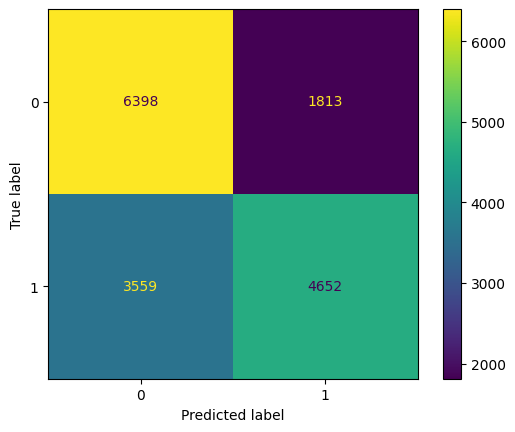

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_05)
disp.plot()

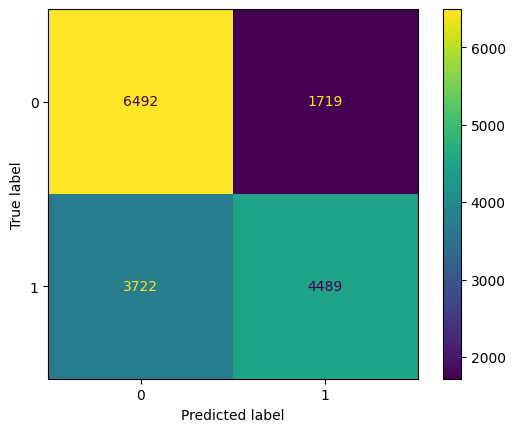

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1_05)
disp.plot()

In [34]:
def treshold_03(x):
  if x > 0.3:
    return 1
  return 0

In [35]:
preds_03 = np.vectorize(treshold_03)(preds)
preds_1_03 = np.vectorize(treshold_03)(preds_1)

In [36]:
recall_score(y_test, preds_03)

0.6460845207648277

In [37]:
accuracy_score(y_test, preds_03)

0.6658750456704421

In [38]:
recall_score(y_test, preds_1_03)

0.7801729387407137

In [39]:
accuracy_score(y_test, preds_1_03)

0.6368286445012787

In [40]:
cm_03 = confusion_matrix(y_test, preds_03)

In [41]:
cm_1_03 = confusion_matrix(y_test, preds_1_03)

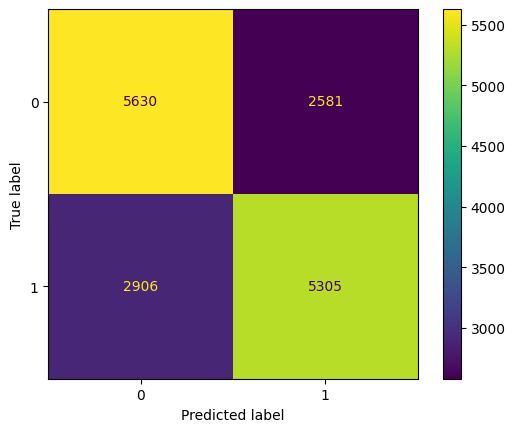

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_03)
disp.plot()

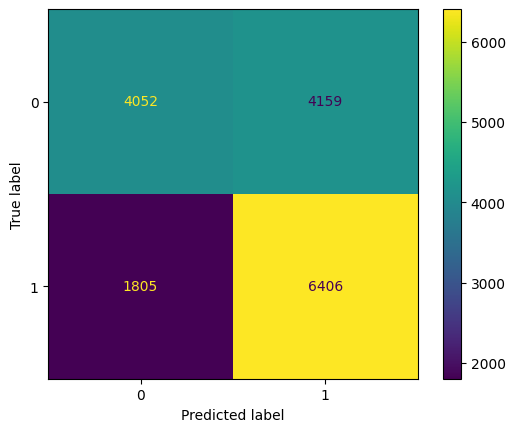

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1_03)
disp.plot()